In [16]:
from pathlib import Path
import os
import pandas as pd

notebook_dir = Path(r"c:\Users\kaidc\Documents\Github\quadruped_design\testing\data")
os.chdir(notebook_dir)


# Plotter Function

In [50]:
def plot_data(df, title, time_col="elapsed time", topic_labels=None, x_label=None, y_label="value", start=None, end=None, legend_loc=None, error_pair=None, error_label="error", line_colors=None, error_color=None):
    import matplotlib.pyplot as plt

    if time_col not in df.columns:
        raise ValueError(f"Missing time column: {time_col}")

    # Plot all non-time columns as topics
    topic_cols = [c for c in df.columns if c not in {"timestamp", "elapsed time"}]
    if not topic_cols:
        raise ValueError("No topic columns to plot.")

    if topic_labels is None:
        topic_labels = {}

    plot_df = df.copy()
    if start is not None:
        plot_df = plot_df[plot_df[time_col] >= start]
    if end is not None:
        plot_df = plot_df[plot_df[time_col] <= end]

    if plot_df.empty:
        raise ValueError("No data in the requested time range.")

    error_series = None
    if error_pair is not None:
        actual_col, target_col = error_pair
        if actual_col not in plot_df.columns or target_col not in plot_df.columns:
            raise ValueError(f"Missing error columns: {actual_col}, {target_col}")
        error_series = plot_df[actual_col] - plot_df[target_col]

    # Shift elapsed time to start at zero when trimming
    if time_col == "elapsed time" and (start is not None or end is not None):
        plot_df = plot_df.copy()
        plot_df[time_col] = plot_df[time_col] - plot_df[time_col].iloc[0]

    plt.figure(figsize=(10, 6))
    for topic in topic_cols:
        label = topic_labels.get(topic, topic)
        color = None
        if line_colors is not None:
            color = line_colors.get(topic)
        plt.plot(plot_df[time_col], plot_df[topic], label=label, color=color)
    if error_series is not None:
        plt.plot(plot_df[time_col], error_series, label=error_label, color=error_color)
    plt.title(title)
    plt.xlabel(x_label if x_label is not None else time_col)
    plt.ylabel(y_label if y_label is not None else "value")
    if legend_loc is None:
        plt.legend()
    else:
        plt.legend(loc=legend_loc)
    plt.grid()
    plt.show()

def plot_joint_suite(hip_roll, hip_pitch, knee_pitch, torques, currents,
                     hip_roll_topic_labels, hip_pitch_topic_labels,
                     knee_pitch_topic_labels, torque_topic_labels,
                     start=None, end=None, time_col="elapsed time", legend_loc=None,
                     hip_roll_line_colors=None, hip_pitch_line_colors=None,
                     knee_pitch_line_colors=None, torque_line_colors=None,
                     current_line_colors=None, error_color=None):
    plot_data(
        hip_roll,
        "Foward Kinematics Test - Hip Roll",
        topic_labels=hip_roll_topic_labels,
        x_label="Time (s)",
        y_label="Angle (rad)",
        start=start,
        end=end,
        time_col=time_col,
        legend_loc=legend_loc,
        error_pair=("/joint_states.position[0]", "/static_joints_controller/commands.data[0]"),
        error_label="error (actual - command)",
        line_colors=hip_roll_line_colors,
        error_color=error_color,
    )

    plot_data(
        hip_pitch,
        "Foward Kinematics Test - Hip Pitch",
        topic_labels=hip_pitch_topic_labels,
        x_label="Time (s)",
        y_label="Angle (rad)",
        start=start,
        end=end,
        time_col=time_col,
        legend_loc=legend_loc,
        error_pair=("/joint_states.position[1]", "/static_joints_controller/commands.data[1]"),
        error_label="error (actual - command)",
        line_colors=hip_pitch_line_colors,
        error_color=error_color,
    )

    plot_data(
        knee_pitch,
        "Foward Kinematics Test - Knee Pitch",
        topic_labels=knee_pitch_topic_labels,
        x_label="Time (s)",
        y_label="Angle (rad)",
        start=start,
        end=end,
        time_col=time_col,
        legend_loc=legend_loc,
        error_pair=("/joint_states.position[2]", "/static_joints_controller/commands.data[2]"),
        error_label="error (actual - command)",
        line_colors=knee_pitch_line_colors,
        error_color=error_color,
    )

    plot_data(
        torques,
        "Torques",
        topic_labels=torque_topic_labels,
        x_label="Time (s)",
        y_label="Torque (N*m)",
        start=start,
        end=end,
        time_col=time_col,
        legend_loc=legend_loc,
        line_colors=torque_line_colors,
    )

    plot_data(
        currents,
        "Test Current",
        topic_labels=torque_topic_labels,
        x_label="Time (s)",
        y_label="Current (A)",
        start=start,
        end=end,
        time_col=time_col,
        legend_loc=legend_loc,
        line_colors=current_line_colors,
    )


# Plotting 

## Helpers

In [54]:
hip_roll_topic_labels = {
    "/joint_states.position[0]": "Hip Roll (actual)",
    "/joint_states.velocity[0]": "Hip Roll (velocity)",
    "/static_joints_controller/commands.data[0]": "Hip Roll (commanded)",
}
1
hip_pitch_topic_labels = {
    "/joint_states.position[1]": "Hip Pitch (actual)",
    "/joint_states.velocity[1]": "Hip Pitch (velocity)",
    "/static_joints_controller/commands.data[1]": "Hip Pitch (commanded)",
}

knee_pitch_topic_labels = {
    "/joint_states.position[2]": "Knee Pitch (actual)",
    "/joint_states.velocity[2]": "Knee Pitch (velocity)",
    "/static_joints_controller/commands.data[2]": "Knee Pitch (commanded)",
}

torque_topic_labels = {
    "/joint_states.effort[0]": "Hip Roll Torque",
    "/joint_states.effort[1]": "Hip Pitch Torque",
    "/joint_states.effort[2]": "Knee Pitch Torque",
}

pos_color = "#1f77b4"
cmd_color = "#ff7f0e"
error_color = "red"

hip_roll_colors = {
    "/joint_states.position[0]": pos_color,
    "/static_joints_controller/commands.data[0]": cmd_color,
}
hip_pitch_colors = {
    "/joint_states.position[1]": pos_color,
    "/static_joints_controller/commands.data[1]": cmd_color,
}
knee_pitch_colors = {
    "/joint_states.position[2]": pos_color,
    "/static_joints_controller/commands.data[2]": cmd_color,
}


## FK Tests

### 1-27

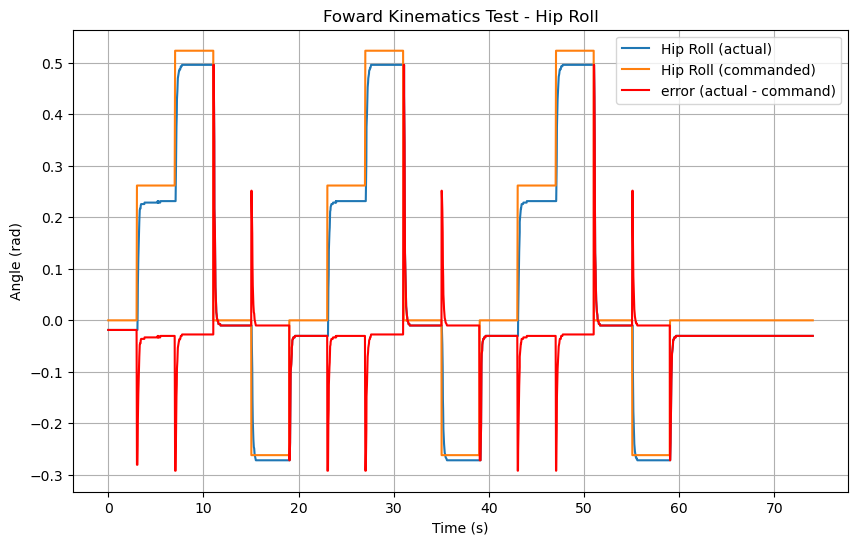

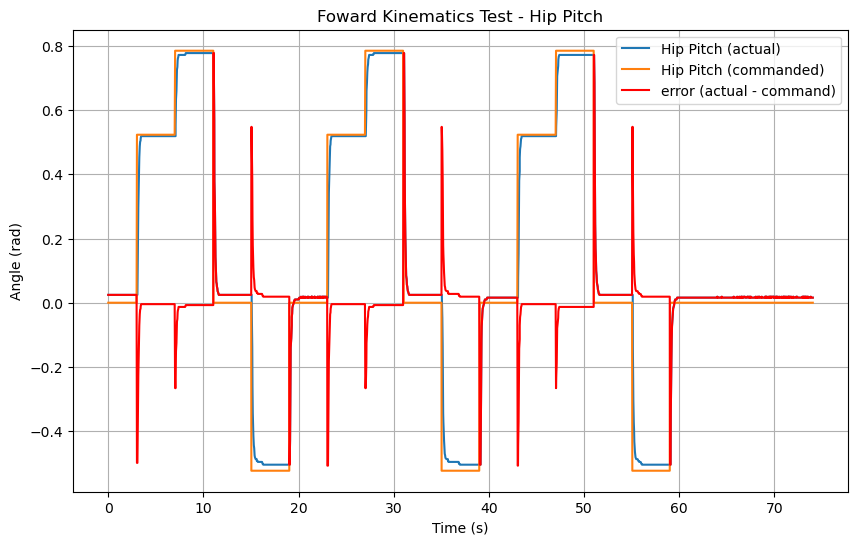

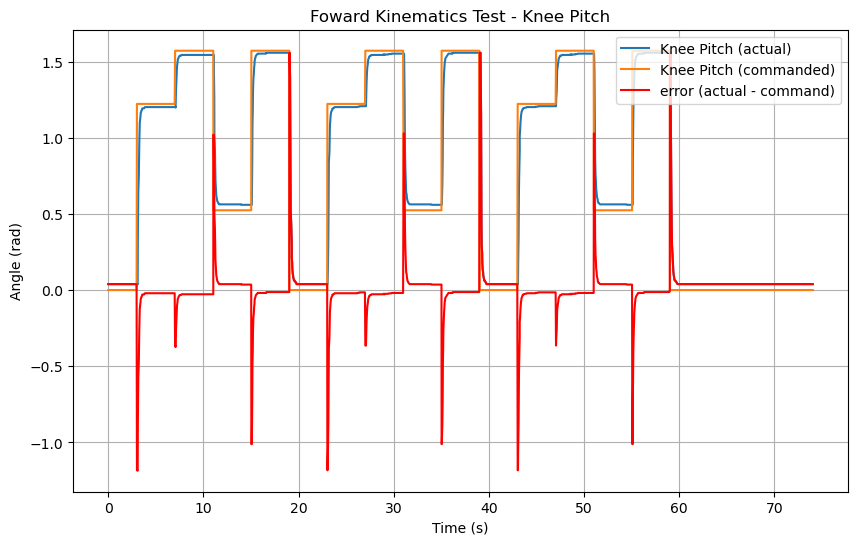

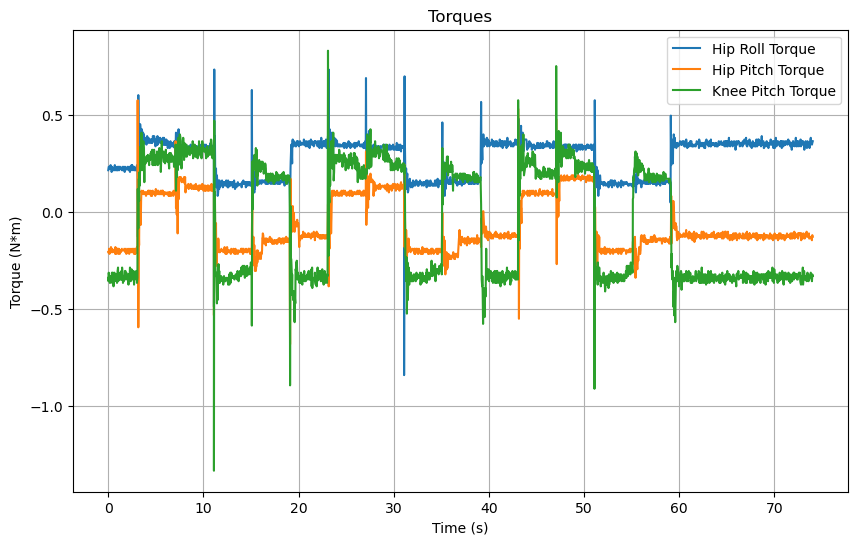

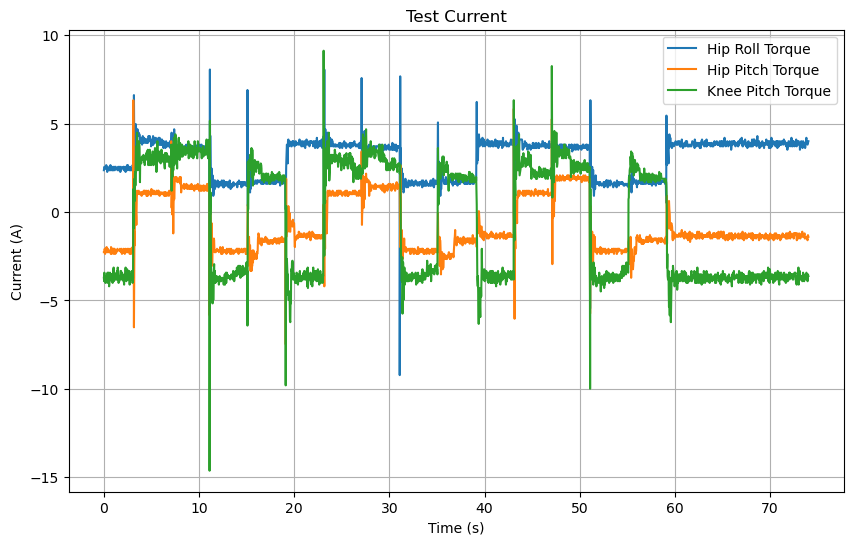

In [55]:
# FK Test 1 - 1-27 
hip_roll = pd.read_csv("FKTests/Test1/Processed/aligned_hip_roll.csv")
hip_pitch = pd.read_csv("FKTests/Test1/Processed/aligned_hip_pitch.csv")
knee_pitch = pd.read_csv("FKTests/Test1/Processed/aligned_knee_pitch.csv")
torques = pd.read_csv("FKTests/Test1/Processed/aligned_torques.csv")
currents = pd.read_csv("FKTests/Test1/Processed/aligned_current.csv")
plot_joint_suite(
    hip_roll,
    hip_pitch,
    knee_pitch,
    torques,
    currents,
    hip_roll_topic_labels,
    hip_pitch_topic_labels,
    knee_pitch_topic_labels,
    torque_topic_labels,
    start=30,
    end=150,
    legend_loc="upper right",
    hip_roll_line_colors=hip_roll_colors,
    hip_pitch_line_colors=hip_pitch_colors,
    knee_pitch_line_colors=knee_pitch_colors,
    error_color=error_color,
)

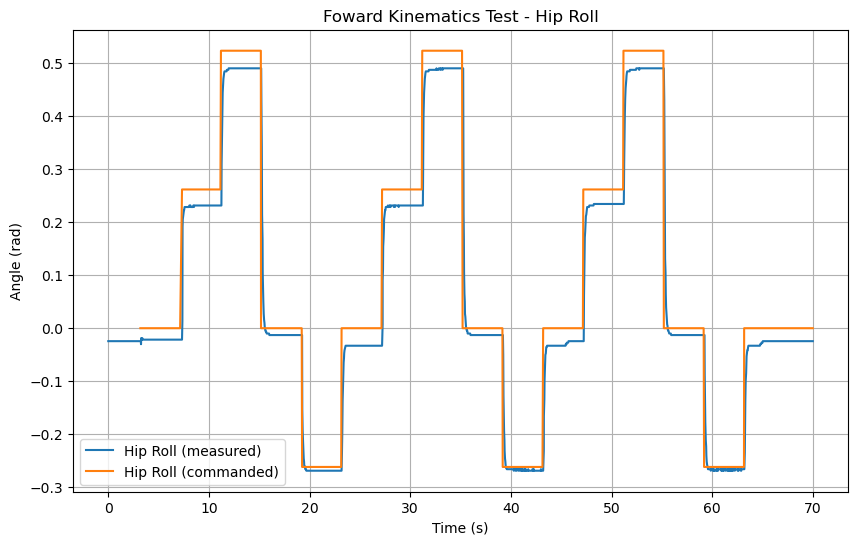

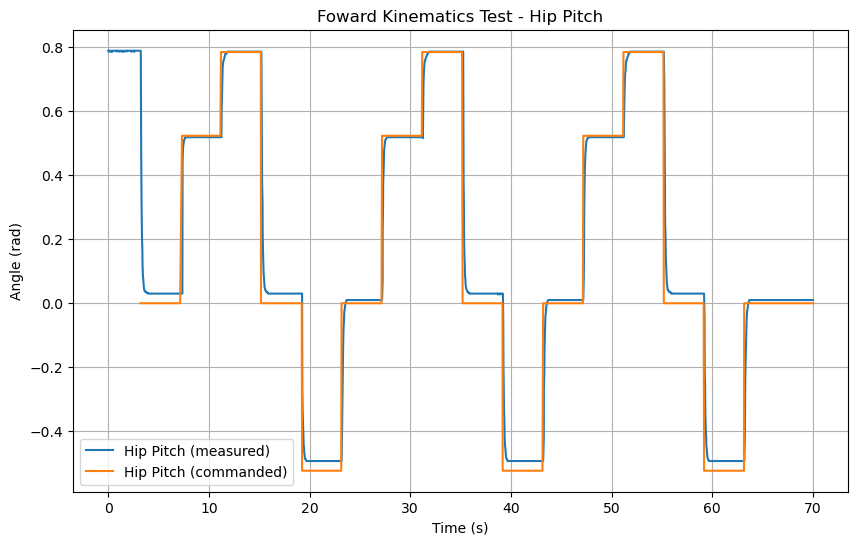

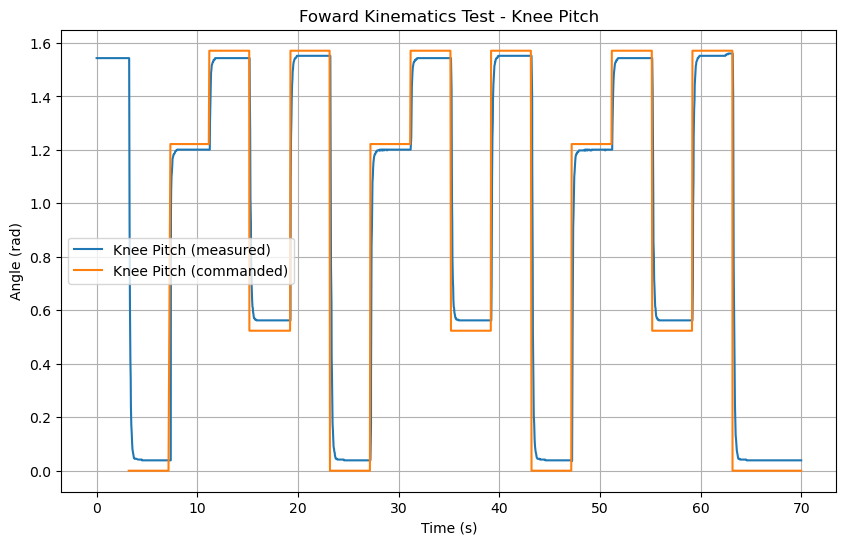

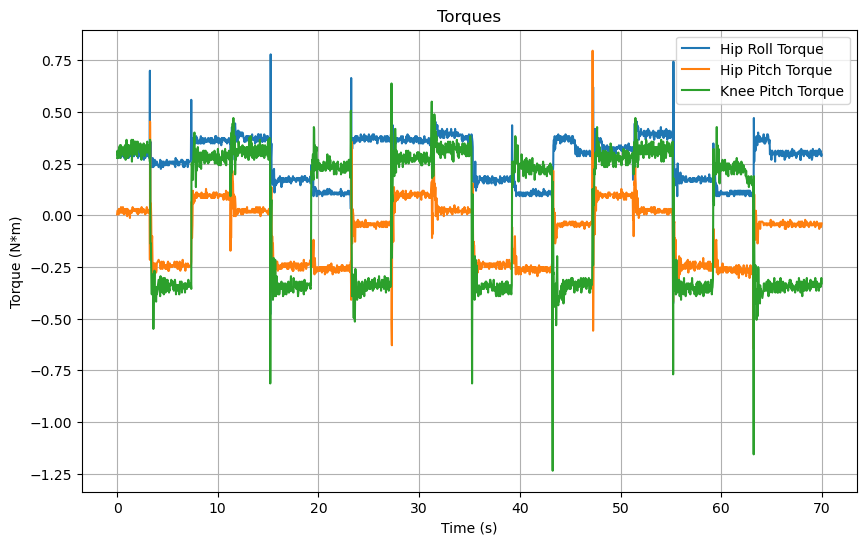

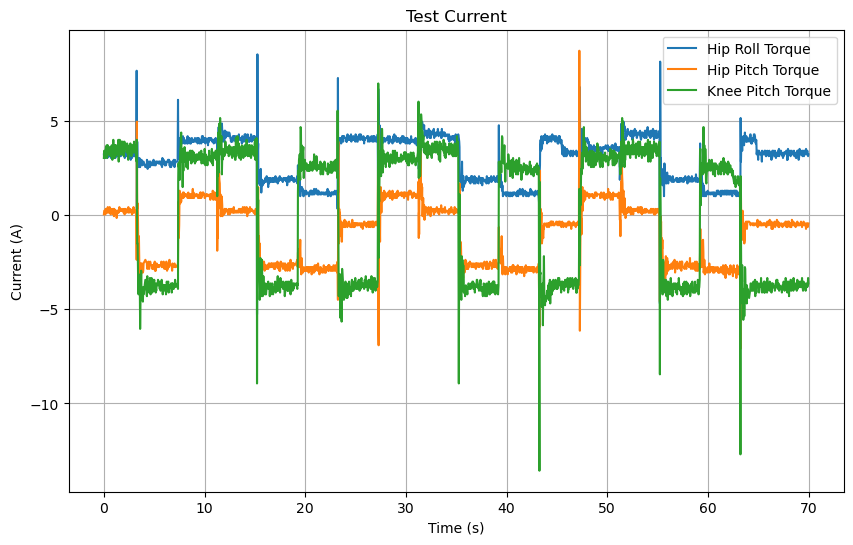

In [37]:
# FK Test 2 - 1-27 
hip_roll = pd.read_csv("FKTests/Test2/Processed/aligned_hip_roll.csv")
hip_pitch = pd.read_csv("FKTests/Test2/Processed/aligned_hip_pitch.csv")
knee_pitch = pd.read_csv("FKTests/Test2/Processed/aligned_knee_pitch.csv")
torques = pd.read_csv("FKTests/Test2/Processed/aligned_torques.csv")
currents = pd.read_csv("FKTests/Test2/Processed/aligned_current.csv")
plot_joint_suite(
    hip_roll,
    hip_pitch,
    knee_pitch,
    torques,
    currents,
    hip_roll_topic_labels,
    hip_pitch_topic_labels,
    knee_pitch_topic_labels,
    torque_topic_labels,
    start=10,
    end=80,
)

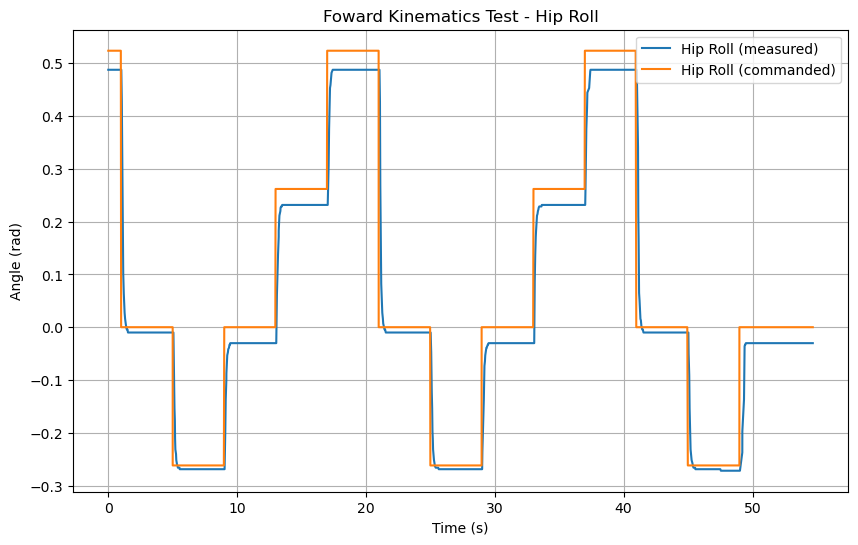

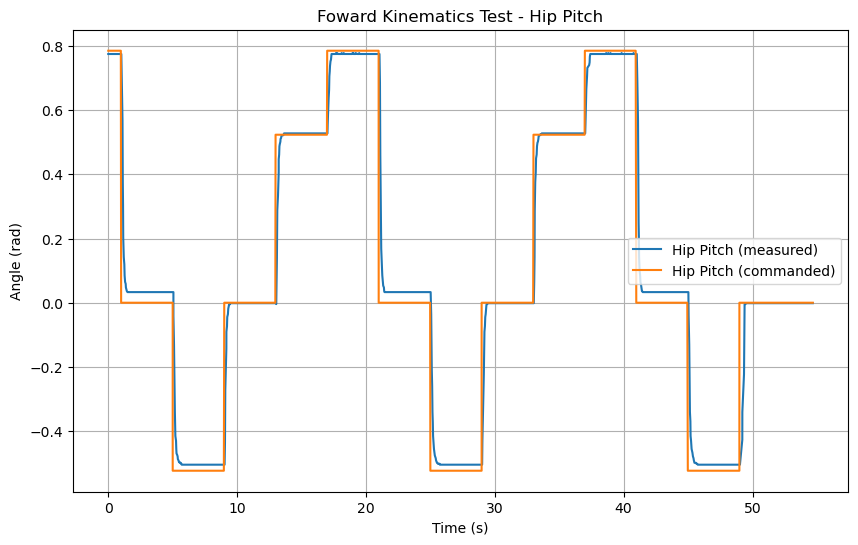

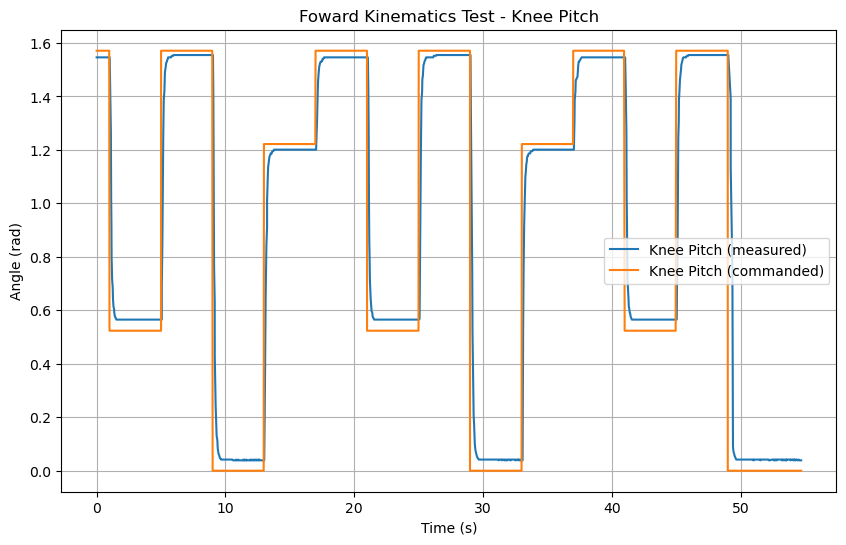

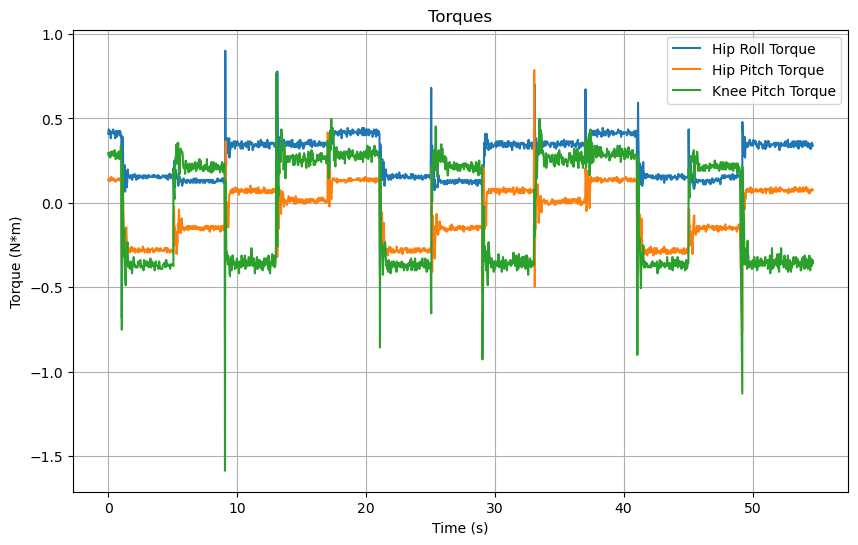

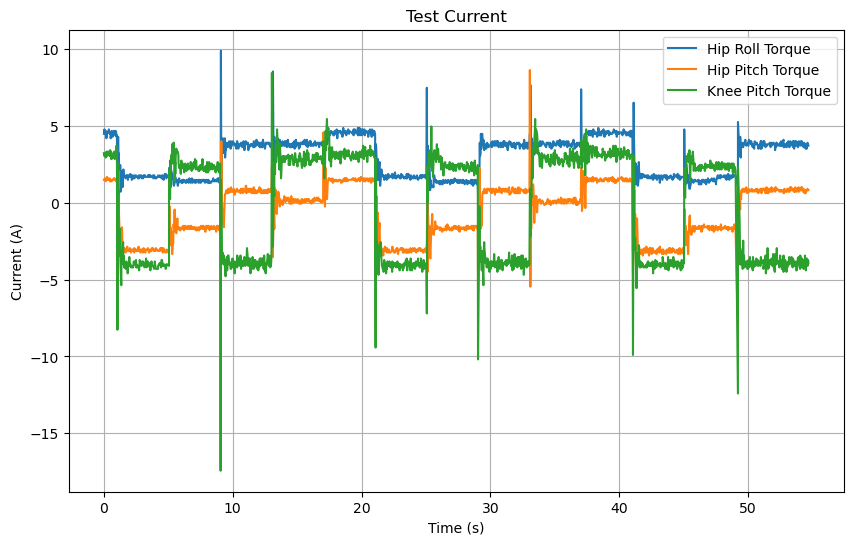

In [38]:
# FK Test 3 - 1-27 
hip_roll = pd.read_csv("FKTests/Test3/Processed/aligned_hip_roll.csv")
hip_pitch = pd.read_csv("FKTests/Test3/Processed/aligned_hip_pitch.csv")
knee_pitch = pd.read_csv("FKTests/Test3/Processed/aligned_knee_pitch.csv")
torques = pd.read_csv("FKTests/Test3/Processed/aligned_torques.csv")
currents = pd.read_csv("FKTests/Test3/Processed/aligned_current.csv")
plot_joint_suite(
    hip_roll,
    hip_pitch,
    knee_pitch,
    torques,
    currents,
    hip_roll_topic_labels,
    hip_pitch_topic_labels,
    knee_pitch_topic_labels,
    torque_topic_labels,
    start=25,
    end=100,
)

## IK Tests

### 1-27


#### Crouched Stance
  

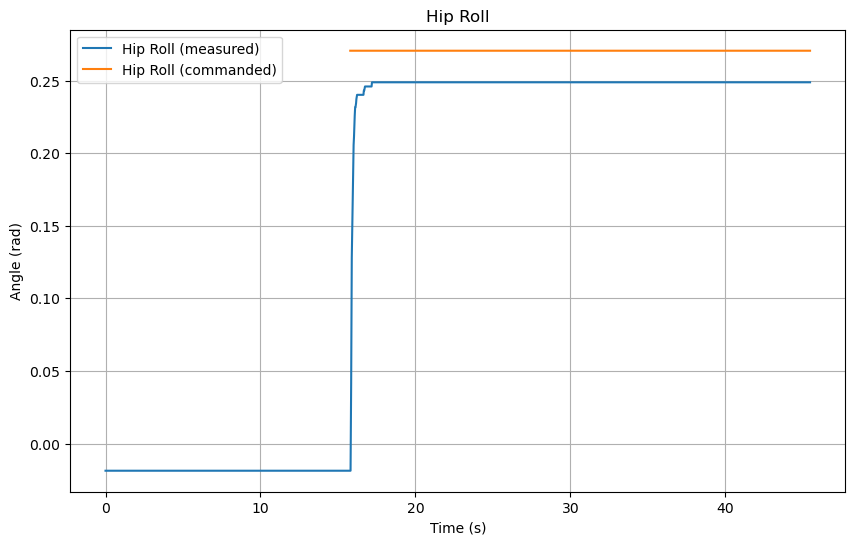

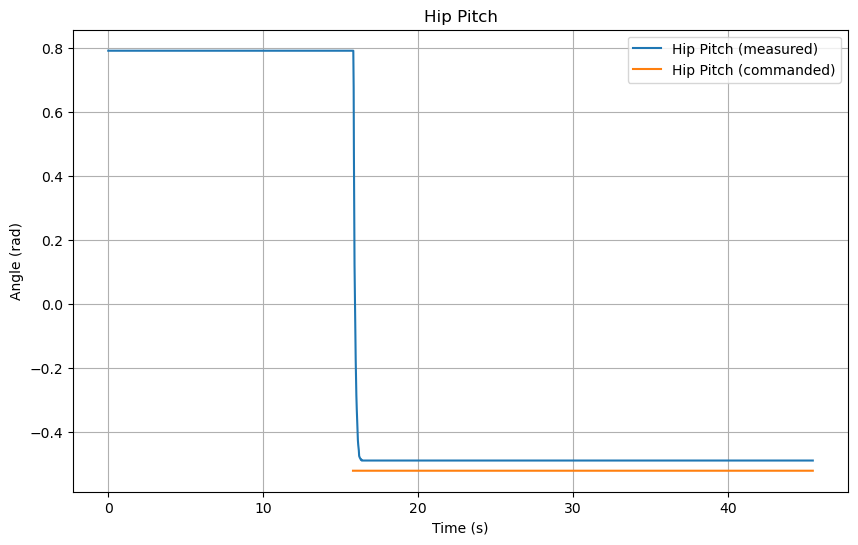

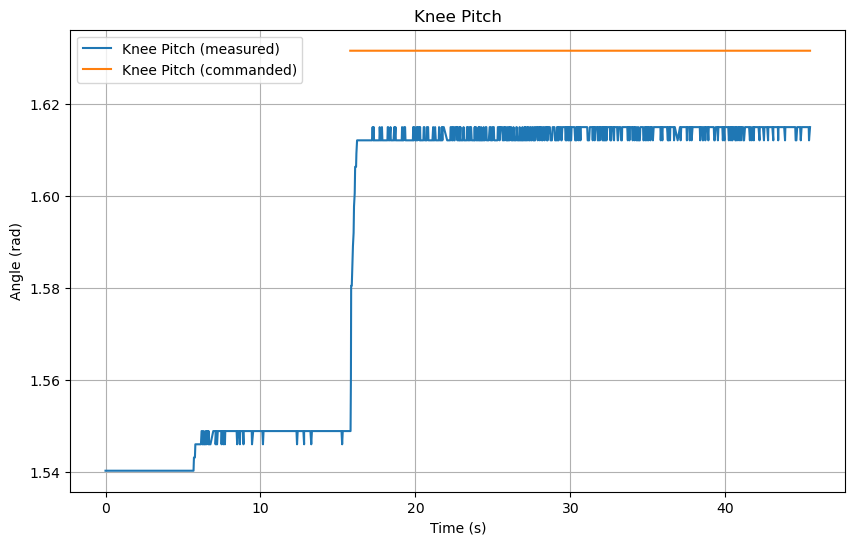

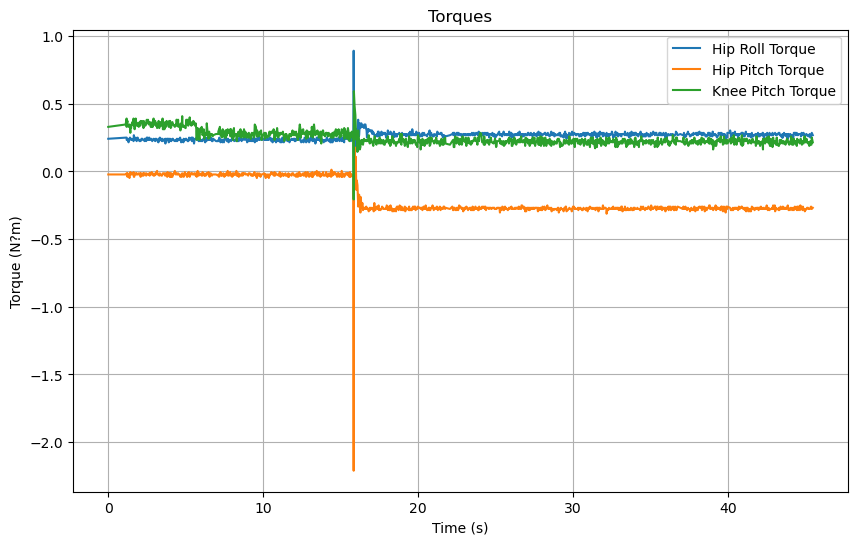

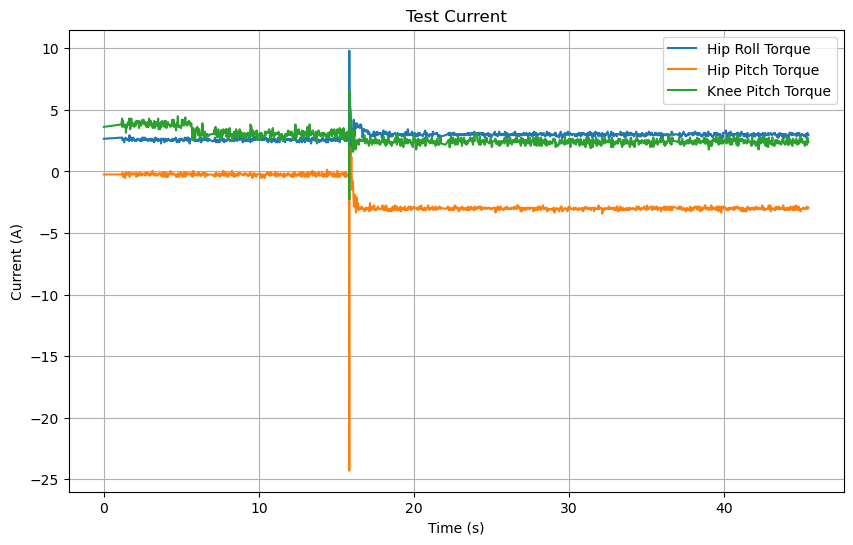

In [ ]:
# Crouched Stance
hip_roll = pd.read_csv("IKTests/crouched_stance/Processed/aligned_hip_roll.csv")
hip_pitch = pd.read_csv("IKTests/crouched_stance/Processed/aligned_hip_pitch.csv")
knee_pitch = pd.read_csv("IKTests/crouched_stance/Processed/aligned_knee_pitch.csv")
torques = pd.read_csv("IKTests/crouched_stance/Processed/aligned_torques.csv")
currents = pd.read_csv("IKTests/crouched_stance/Processed/aligned_current.csv")
plot_joint_suite(
    hip_roll,
    hip_pitch,
    knee_pitch,
    torques,
    currents,
    hip_roll_topic_labels,
    hip_pitch_topic_labels,
    knee_pitch_topic_labels,
    torque_topic_labels,
    # start=760,
    # end=900,
)

#### Extended Stance

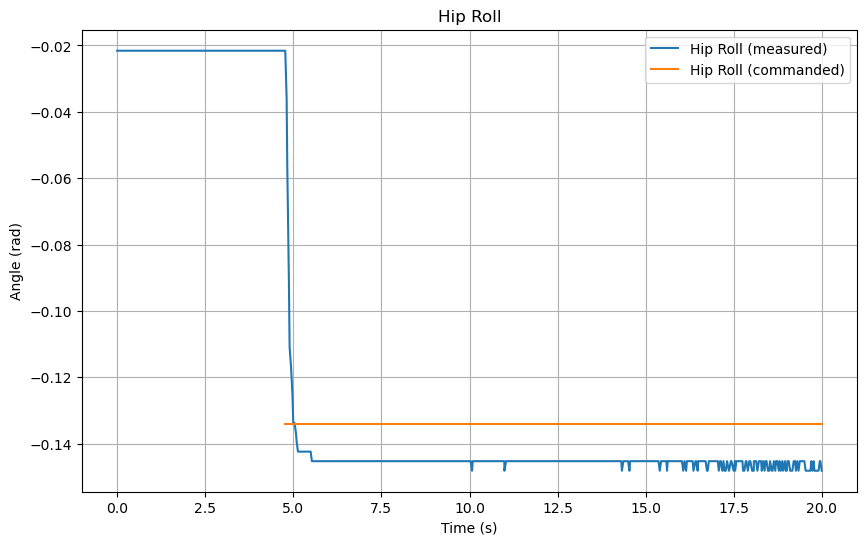

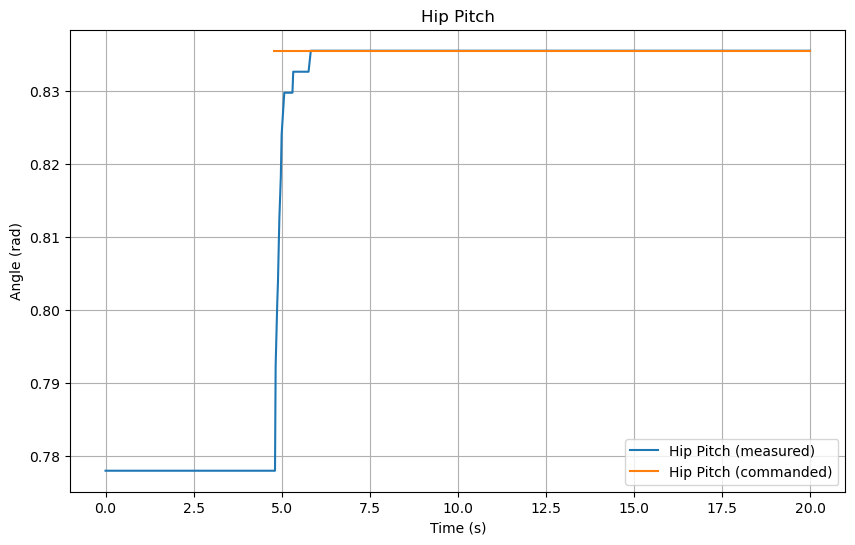

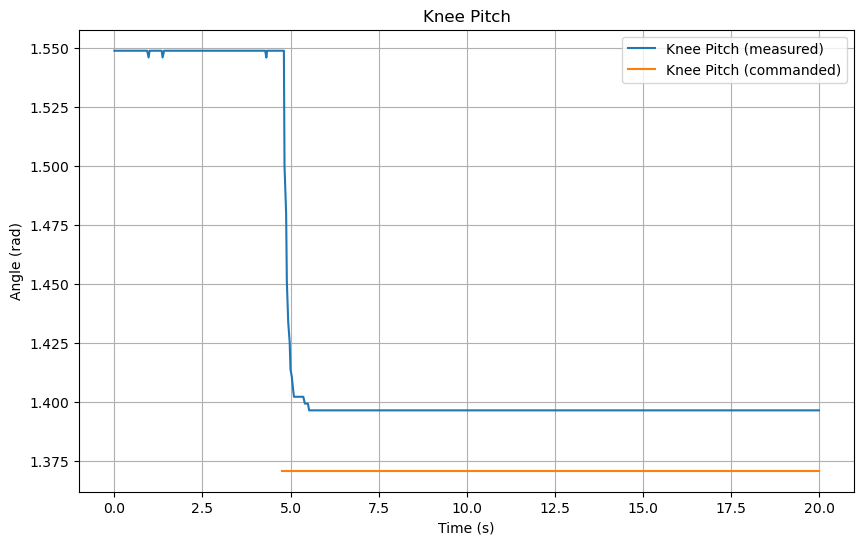

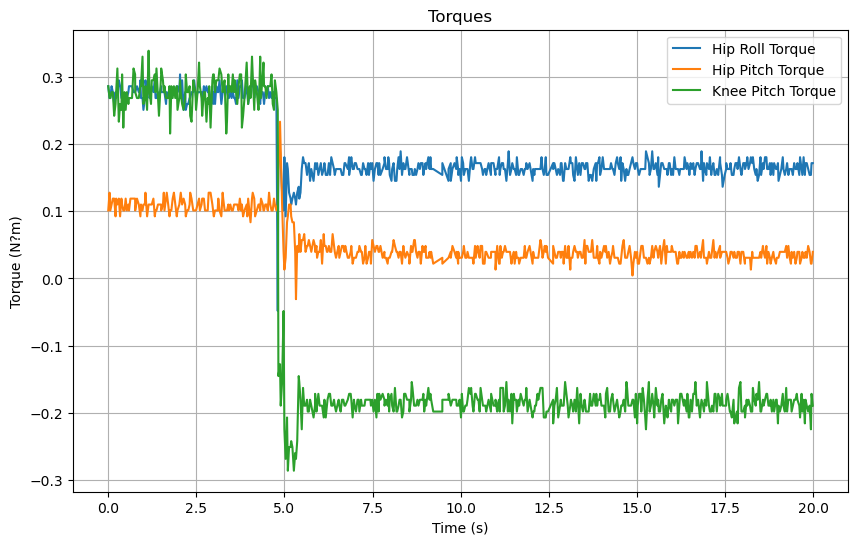

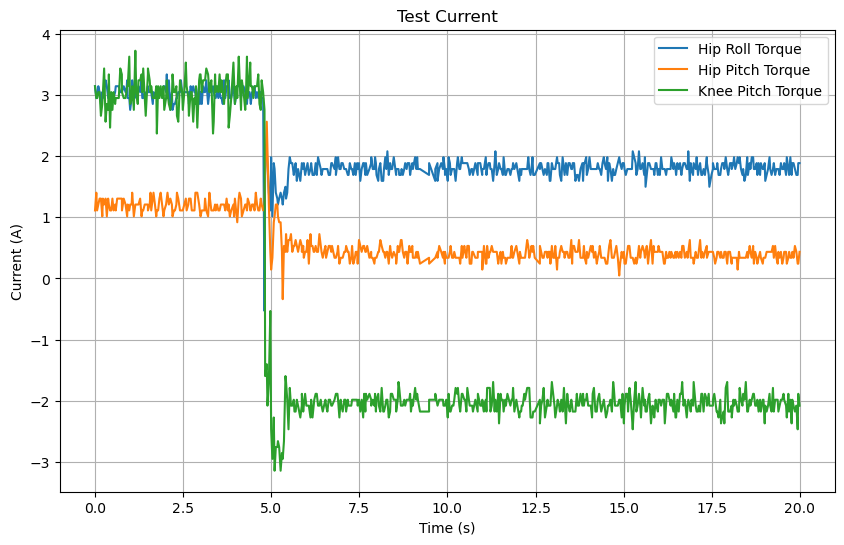

In [ ]:
# Extended Stance
hip_roll = pd.read_csv("IKTests/extended_stance/Processed/aligned_hip_roll.csv")
hip_pitch = pd.read_csv("IKTests/extended_stance/Processed/aligned_hip_pitch.csv")
knee_pitch = pd.read_csv("IKTests/extended_stance/Processed/aligned_knee_pitch.csv")
torques = pd.read_csv("IKTests/extended_stance/Processed/aligned_torques.csv")
currents = pd.read_csv("IKTests/extended_stance/Processed/aligned_current.csv")
plot_joint_suite(
    hip_roll,
    hip_pitch,
    knee_pitch,
    torques,
    currents,
    hip_roll_topic_labels,
    hip_pitch_topic_labels,
    knee_pitch_topic_labels,
    torque_topic_labels,
    start=5,
    end=25,
)

#### Standard Stance

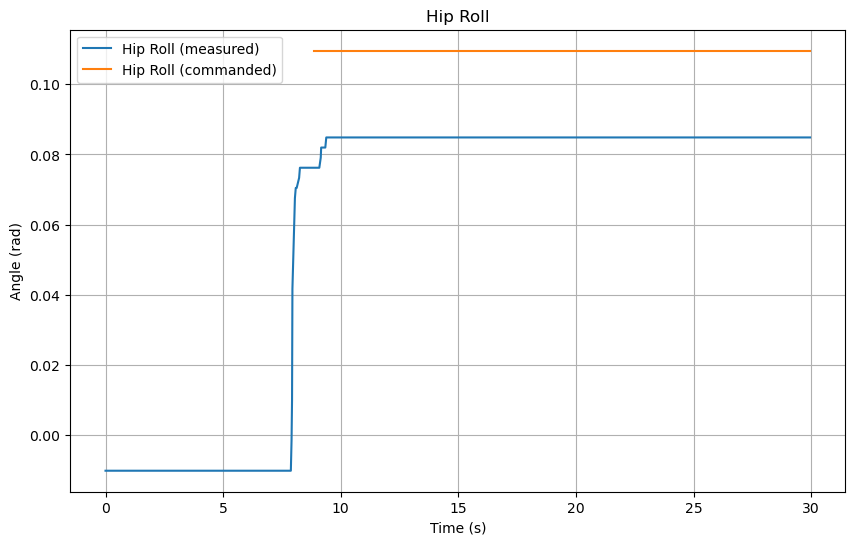

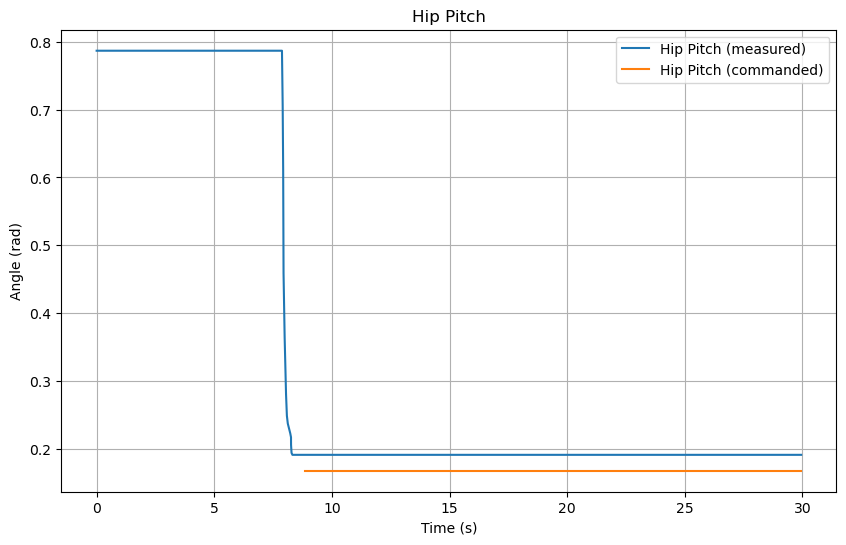

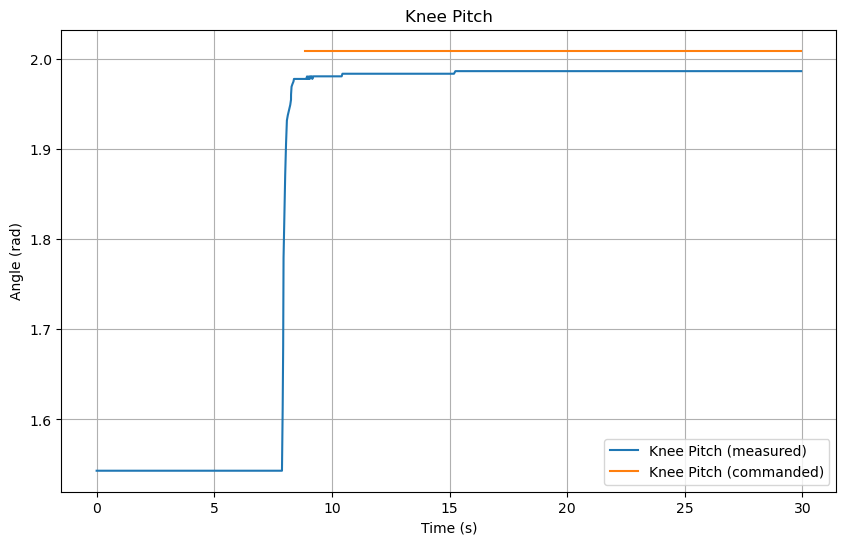

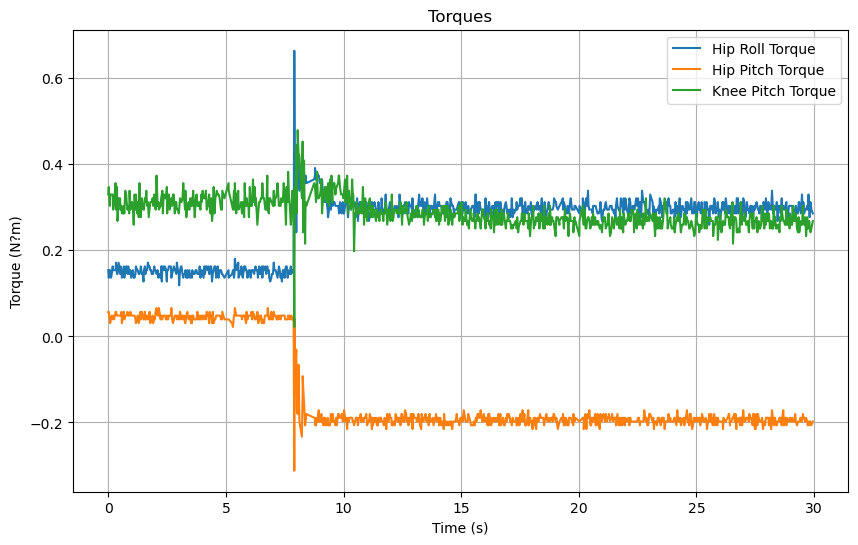

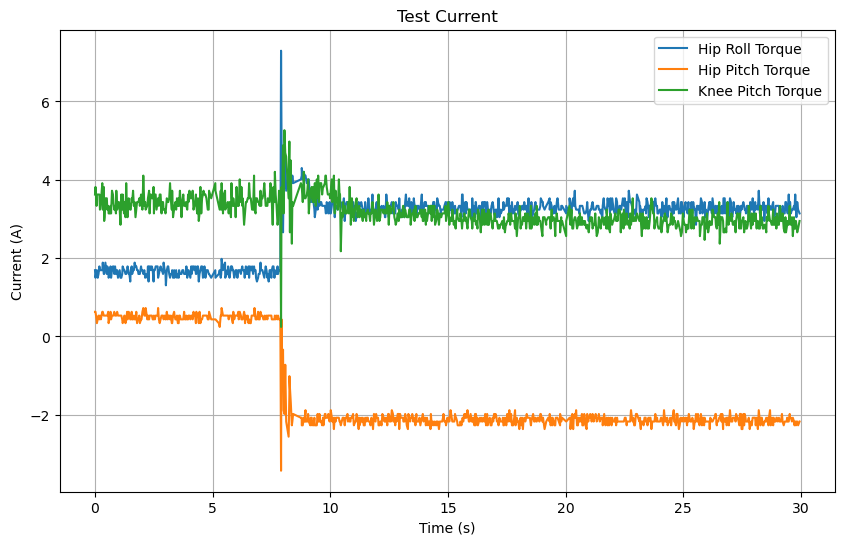

In [ ]:
hip_roll = pd.read_csv("IKTests/standard-stance/Processed/aligned_hip_roll.csv")
hip_pitch = pd.read_csv("IKTests/standard-stance/Processed/aligned_hip_pitch.csv")
knee_pitch = pd.read_csv("IKTests/standard-stance/Processed/aligned_knee_pitch.csv")
torques = pd.read_csv("IKTests/standard-stance/Processed/aligned_torques.csv")
currents = pd.read_csv("IKTests/standard-stance/Processed/aligned_current.csv")
plot_joint_suite(
    hip_roll,
    hip_pitch,
    knee_pitch,
    torques,
    currents,
    hip_roll_topic_labels,
    hip_pitch_topic_labels,
    knee_pitch_topic_labels,
    torque_topic_labels,
    start=10,
    end=40,
)

## Impedance

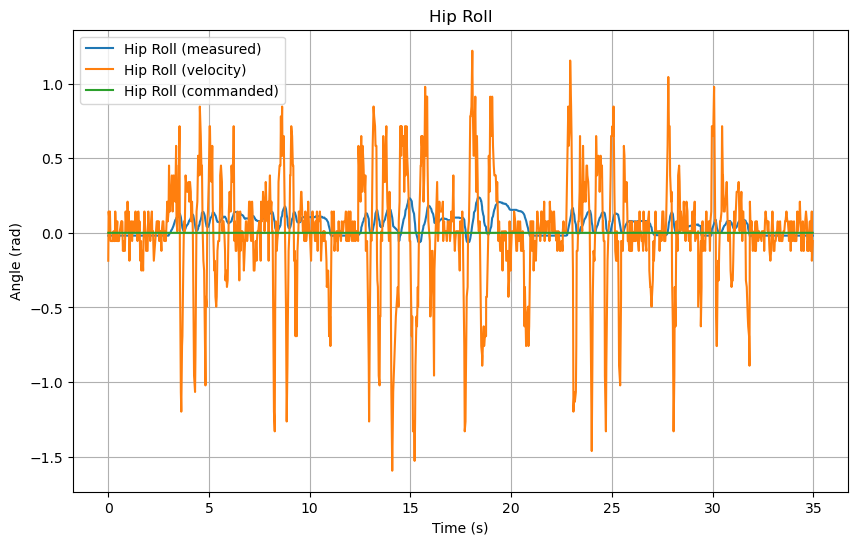

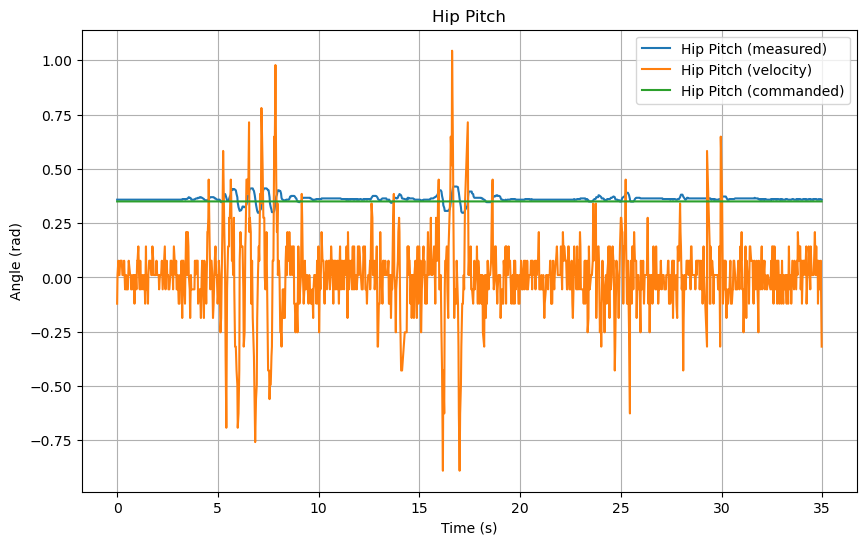

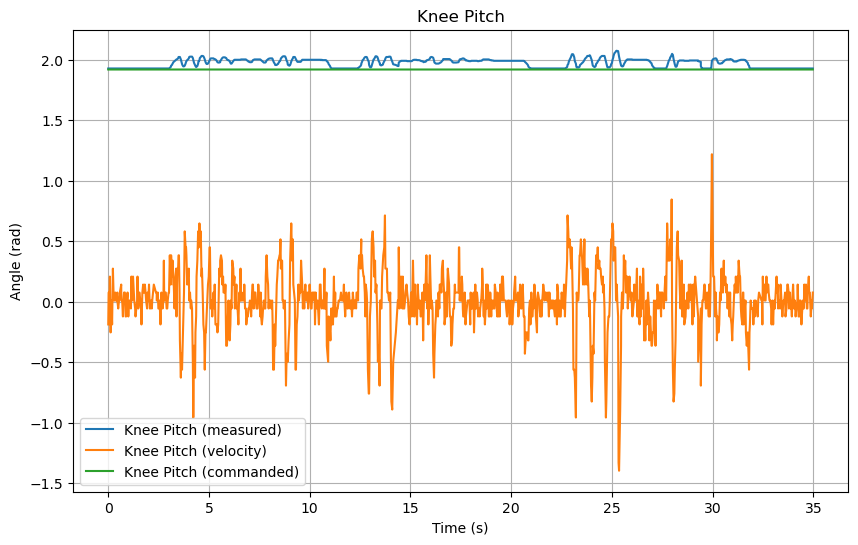

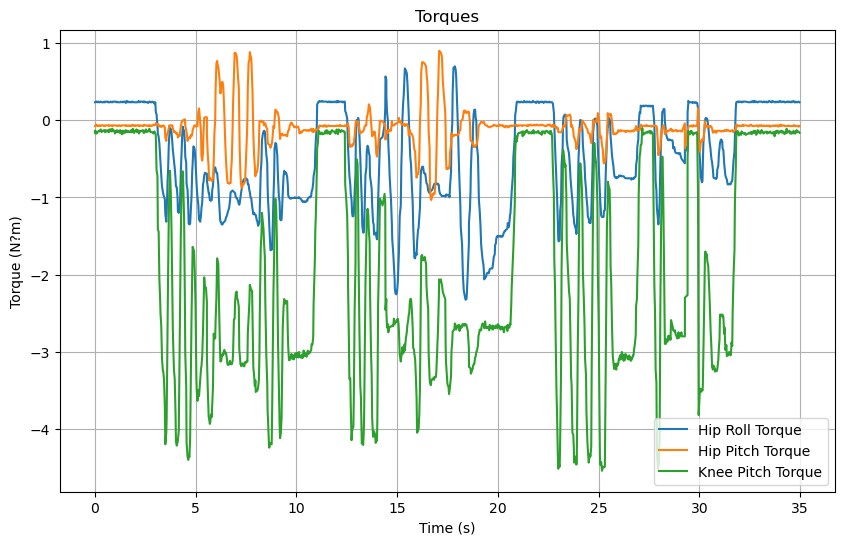

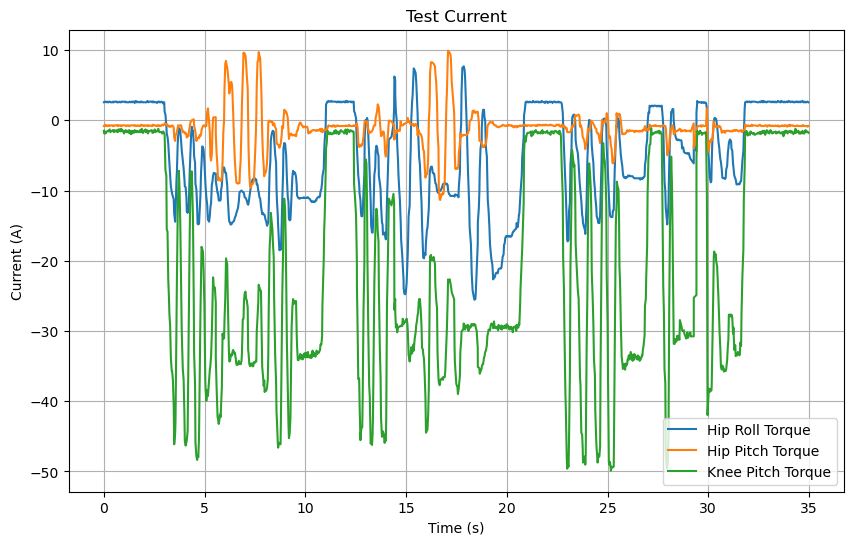

In [ ]:
hip_roll = pd.read_csv("ImpTests/Test4/Processed/aligned_hip_roll.csv")
hip_pitch = pd.read_csv("ImpTests/Test4/Processed/aligned_hip_pitch.csv")
knee_pitch = pd.read_csv("ImpTests/Test4/Processed/aligned_knee_pitch.csv")
torques = pd.read_csv("ImpTests/Test4/Processed/aligned_torques.csv")
currents = pd.read_csv("ImpTests/Test4/Processed/aligned_current.csv")
plot_joint_suite(
    hip_roll,
    hip_pitch,
    knee_pitch,
    torques,
    currents,
    hip_roll_topic_labels,
    hip_pitch_topic_labels,
    knee_pitch_topic_labels,
    torque_topic_labels,
    start=15,
    end=50,
)

## Impact Tests

### Drop 12

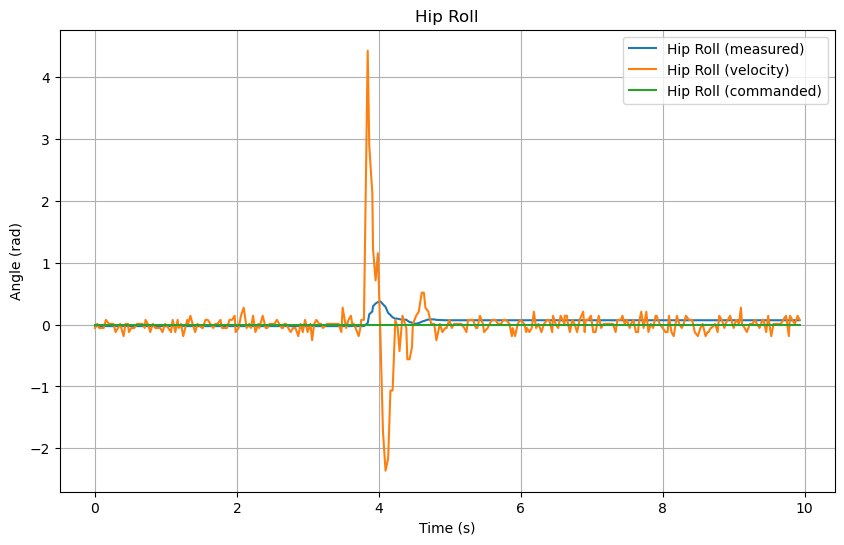

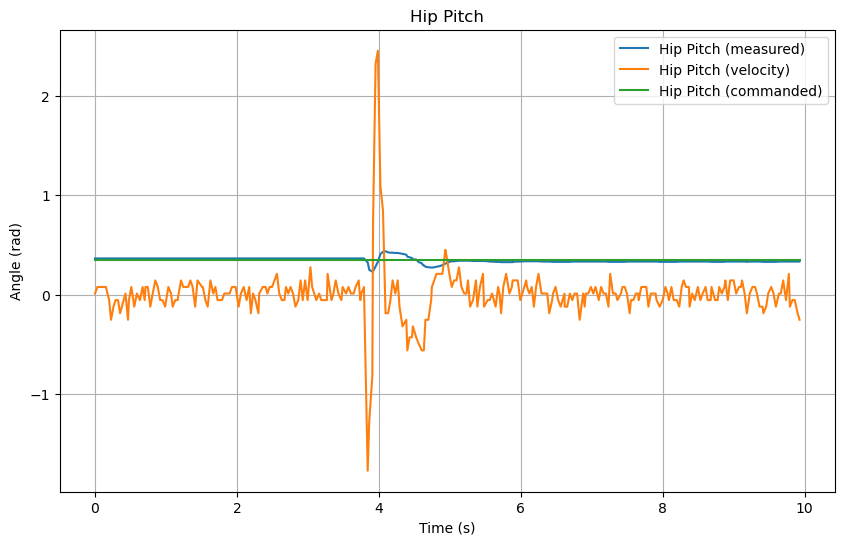

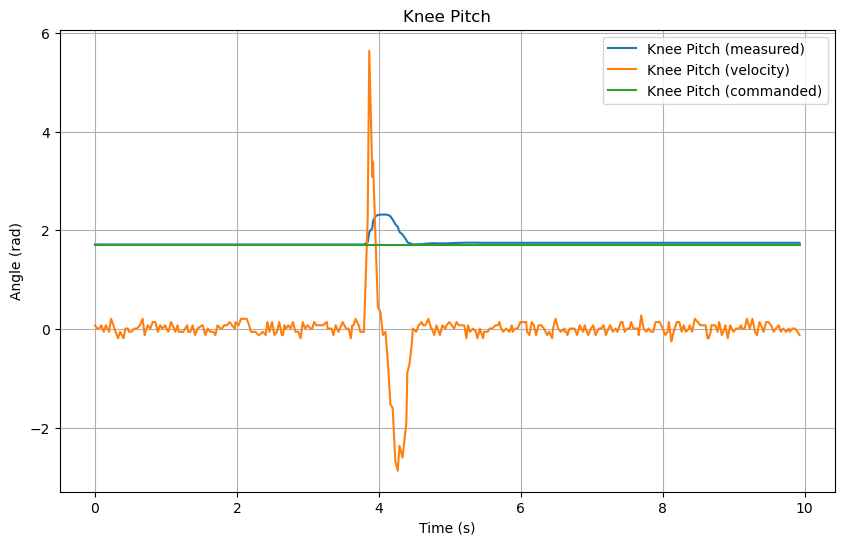

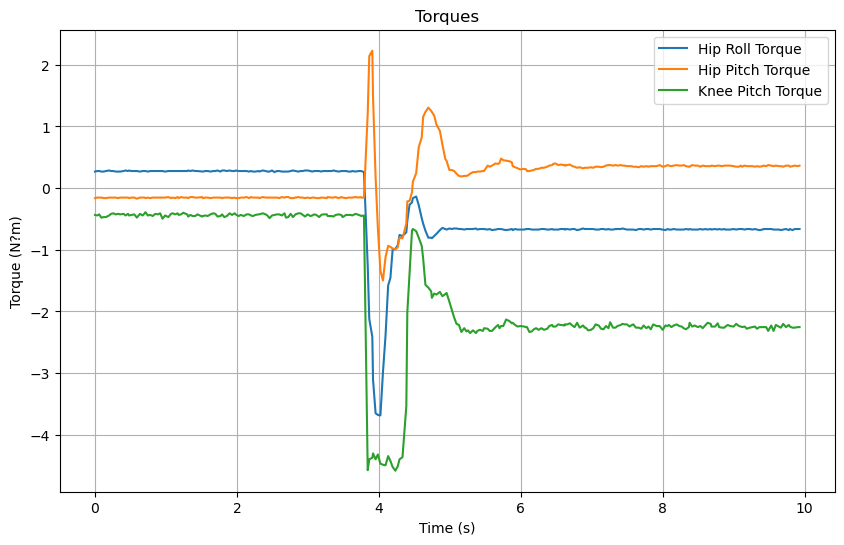

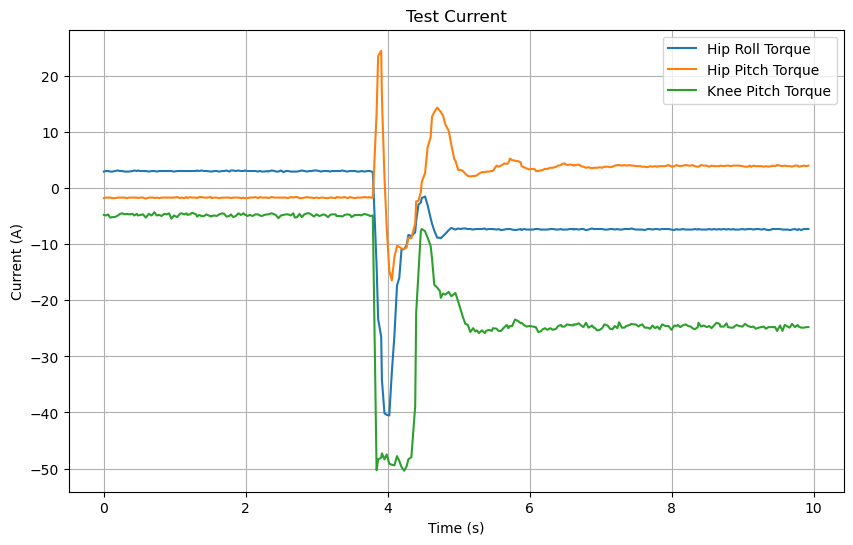

In [ ]:
hip_roll = pd.read_csv("ImpactTests/drop12/Processed/aligned_hip_roll.csv")
hip_pitch = pd.read_csv("ImpactTests/drop12/Processed/aligned_hip_pitch.csv")
knee_pitch = pd.read_csv("ImpactTests/drop12/Processed/aligned_knee_pitch.csv")
torques = pd.read_csv("ImpactTests/drop12/Processed/aligned_torques.csv")
currents = pd.read_csv("ImpactTests/drop12/Processed/aligned_current.csv")
plot_joint_suite(
    hip_roll,
    hip_pitch,
    knee_pitch,
    torques,
    currents,
    hip_roll_topic_labels,
    hip_pitch_topic_labels,
    knee_pitch_topic_labels,
    torque_topic_labels,
    start=20,
    end=30,
)

### Drop 12 again

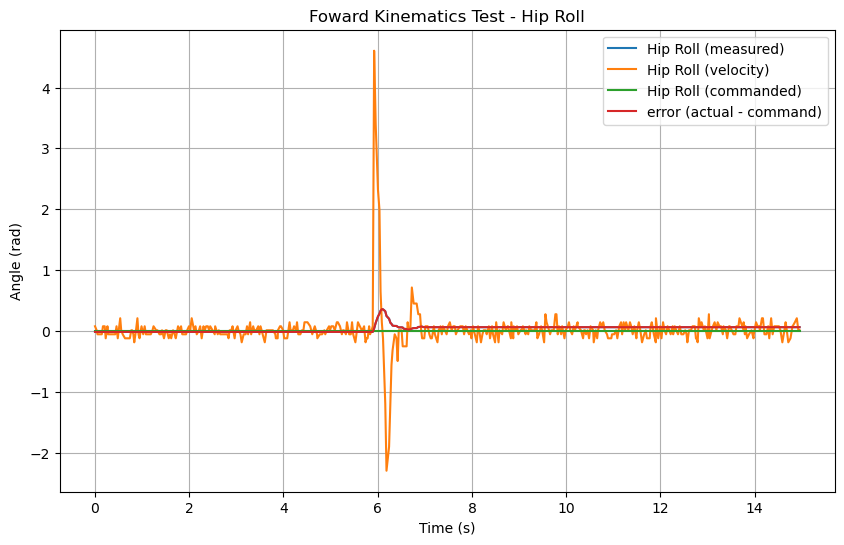

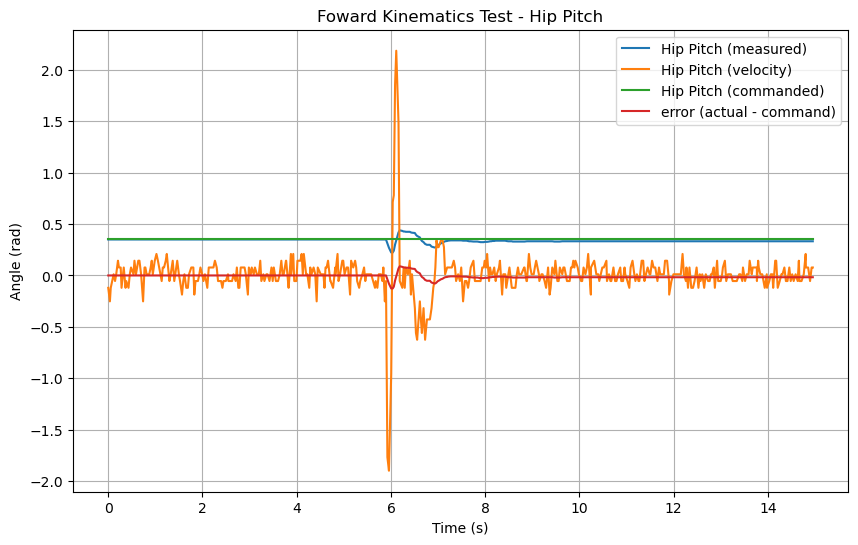

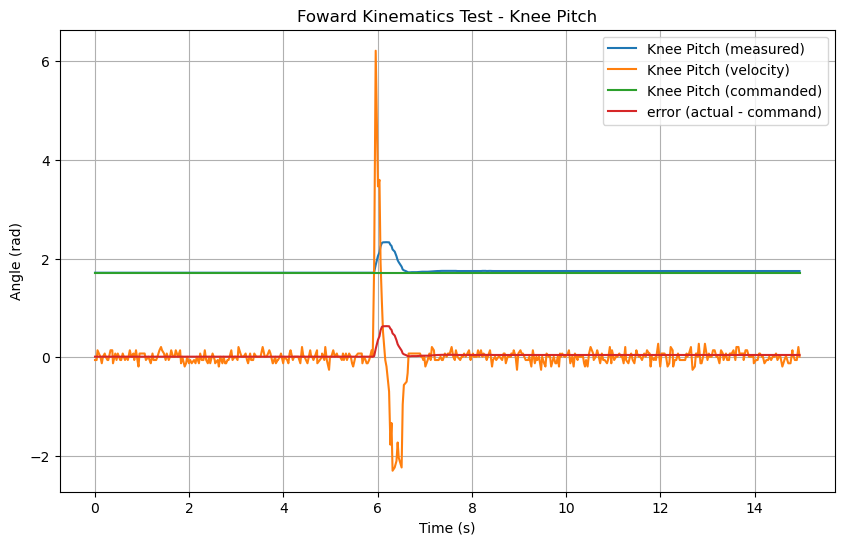

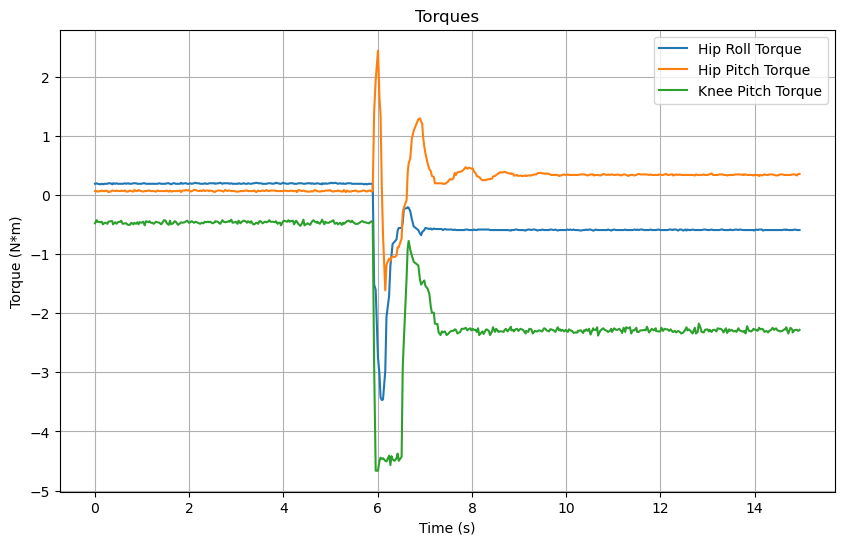

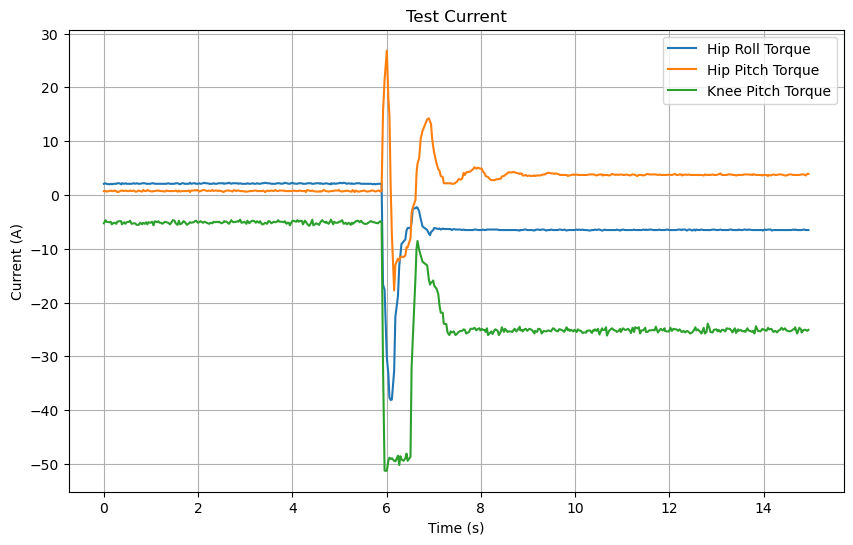

In [48]:
hip_roll = pd.read_csv("ImpactTests/drop12_again/Processed/aligned_hip_roll.csv")
hip_pitch = pd.read_csv("ImpactTests/drop12_again/Processed/aligned_hip_pitch.csv")
knee_pitch = pd.read_csv("ImpactTests/drop12_again/Processed/aligned_knee_pitch.csv")
torques = pd.read_csv("ImpactTests/drop12_again/Processed/aligned_torques.csv")
currents = pd.read_csv("ImpactTests/drop12_again/Processed/aligned_current.csv")
plot_joint_suite(
    hip_roll,
    hip_pitch,
    knee_pitch,
    torques,
    currents,
    hip_roll_topic_labels,
    hip_pitch_topic_labels,
    knee_pitch_topic_labels,
    torque_topic_labels,
    start=10,
    end=25,
)